<a href="https://colab.research.google.com/github/OleksiiLatypov/Bot_Assistant/blob/master/Loan_Approval_Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e10:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F84894%2F9709193%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241011%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241011T204638Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4b52729749e4e7140dea330fed2f50a0d2d12c7fcd5a7c43cd153c7cf377a7ec8ec3989da026d1bf7f008c434b14cc2106c6adb11a22596af6a4200f9986673a76140eb51dff750acb88f3bcd1db0a5c35bbb500c1cf5efa7af21784e1119a18529abfb72dac316b61d3abd218c5d9cdca7542901b7dff35dd178f898ee4e2f260d7cbb77793f88f5ac4c6702055b3482d42e5c4602c792d8c8ccc3b0bb233c63f24fd30926d0d97faacfe5a02c8444ea70c81a46145735c3fb6aa663e2df17fdc66aedd954095923ec89d407ab0f19dbe29b33abe7cd63bdbd62393ac9bb26ce45f295d311fd15b9fedca49b1c00ece9c3f311141374845212547c29ba07bd0,credit-risk:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5830342%2F9566231%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241011%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241011T204639Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7ad27d17e55f36cf1d2646371d42357aa782d9c6b965a5e6d5d641025f60c175b53e385886e82de81c7d15fe401dcaded2771f9aaa1931ecc19d82f32ab4d43c3161a5353e5c59d2c2fa478f67d26fe85aa415549993e178cdafaeefba67a154322fa5545dcb944e3b7b1f2d386d4201e0d639e8ab50c7fffc5199662d671a9a6ffbe4ac6fec3aabefecba84c41ae39515797c6aa14d188ed5a135047bc3049082e0848bd1c70d364f31d206b09fc4327385352d20855430199ae0d0eeef24707b3b84f3b26cdbbc0439db21687b5a25a7c7ba87b59b505a6a39642f1090915af61c8ee0eb617daa9b00355322979a8b747a50ab2ac57f9fce7122b125bb0e78'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1515882 bytes downloaded
Downloaded and uncompressed: playground-series-s4e10
[==================================================] 376518 bytes downloaded
Downloaded and uncompressed: credit-risk
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk/credit_risk_dataset.csv
/kaggle/input/playground-series-s4e10/test.csv
/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv


In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
original = pd.read_csv('/kaggle/input/credit-risk/credit_risk_dataset.csv')

In [4]:
print(train.shape)
print(test.shape)
print(original.shape)

(58645, 13)
(39098, 12)
(32581, 12)


In [5]:
train.loan_status.value_counts()

,count
loan_status,
0,50295
1,8350


In [6]:
original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
# concatenate train and original datasets and explore data

train_origin = pd.concat([train, original], axis=0, ignore_index=True)
train_origin.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0.0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1.0,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2.0,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3.0,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4.0,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [8]:
train_origin['loan_status'].value_counts()

,count
loan_status,
0,75768
1,15458


In [9]:
imbalanced_ratio = train_origin['loan_status'].value_counts()[1] / train_origin['loan_status'].value_counts()[0]
imbalanced_ratio

0.20401752718825888

The imbalanced ratio of approximately 0.204 indicates that the dataset has a imbalance between the two classes of loan status. The model may face some challenges in accurately predicting the minority class.

In [10]:
# drop id column, it is uneccessery column
train_origin = train_origin.drop('id', axis=1)

In [11]:
train_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91226 entries, 0 to 91225
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91226 non-null  int64  
 1   person_income               91226 non-null  int64  
 2   person_home_ownership       91226 non-null  object 
 3   person_emp_length           90331 non-null  float64
 4   loan_intent                 91226 non-null  object 
 5   loan_grade                  91226 non-null  object 
 6   loan_amnt                   91226 non-null  int64  
 7   loan_int_rate               88110 non-null  float64
 8   loan_percent_income         91226 non-null  float64
 9   cb_person_default_on_file   91226 non-null  object 
 10  cb_person_cred_hist_length  91226 non-null  int64  
 11  loan_status                 91226 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 8.4+ MB


In [12]:
train_origin.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,91226.000000,9.122600e+04,90331.000000,91226.000000,88110.000000,91226.000000,91226.000000,91226.000000
mean,27.616480,6.477071e+04,4.732119,9350.348607,10.789508,0.163154,5.810219,0.169447
std,6.148115,4.793696e+04,4.025068,5848.605423,3.108998,0.097491,4.038412,0.375149
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.000000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.700000e+04,4.000000,8000.000000,10.950000,0.140000,4.000000,0.000000
75%,30.000000,7.800000e+04,7.000000,12000.000000,13.110000,0.220000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


Some applicants as old as 144, indicating potential outliers or data inaccuracies. The same with employment length.

In [13]:
train_origin.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,91226,91226,91226,91226
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,47040,18724,31761,76779


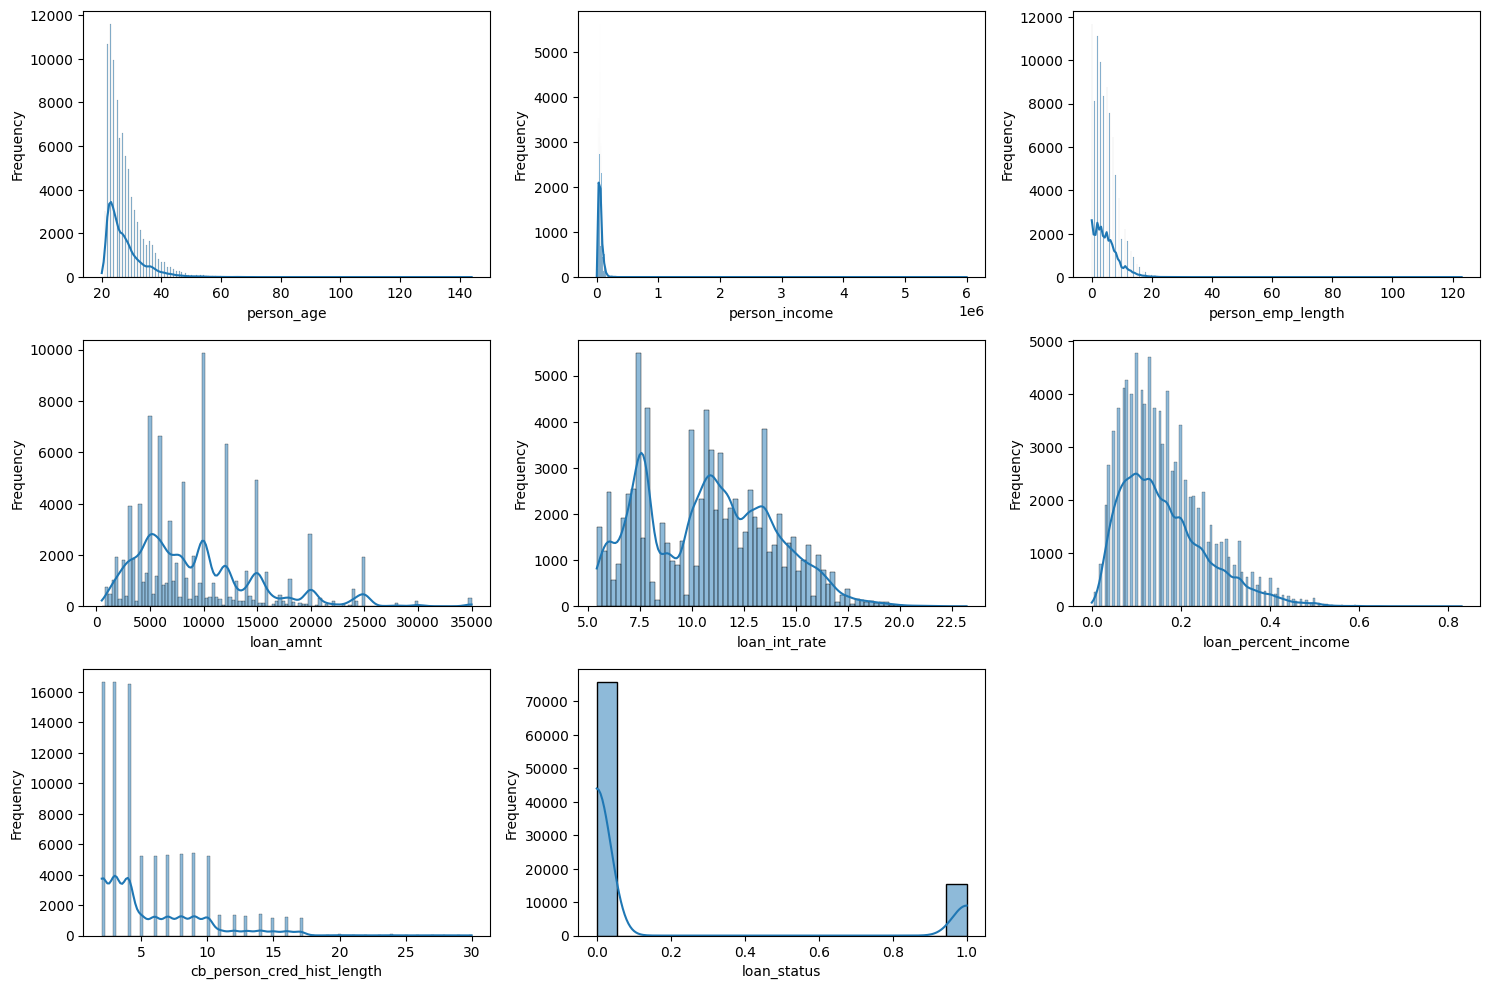

In [14]:
numerical_features = train_origin.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_origin[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [15]:
numerical_features.corrwith(numerical_features.loan_status).abs().sort_values(ascending=False)[1:]

,0
loan_percent_income,0.381631
loan_int_rate,0.339932
person_income,0.152001
loan_amnt,0.130323
person_emp_length,0.091718
person_age,0.008058
cb_person_cred_hist_length,0.008049


<Axes: >

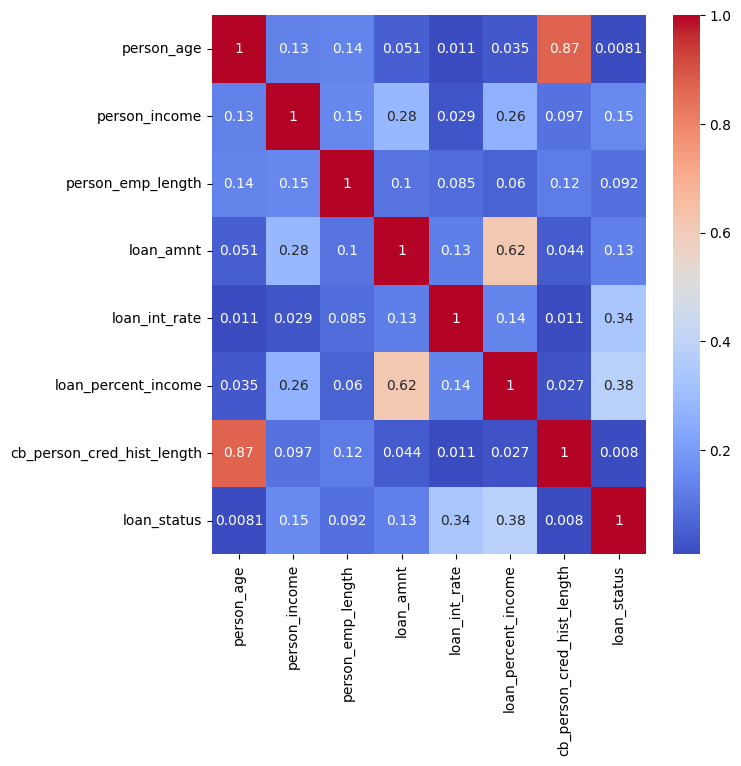

In [16]:
plt.figure(figsize=(7, 7))
corr_data = numerical_features.corr().abs()
sns.heatmap(corr_data, annot=True, cmap='coolwarm')

**High correlation between person_age and cb_person_cred_hist_length:**
There is a strong positive correlation (0.87) between person_age and cb_person_cred_hist_length. This makes sense as the length of a person’s credit history is likely to increase with age.

**Moderate correlations involving loan_percent_income:**
loan_percent_income has a moderate positive correlation (0.62) with loan_amnt, indicating that higher loan amounts often represent a higher percentage of a person's income.

In [17]:
categorical_features = train_origin.select_dtypes(include=['object'])
res = {}
for column in categorical_features.columns:
    res[column] = categorical_features[column].unique()
res

{'person_home_ownership': array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object),
 'loan_intent': array(['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
        'HOMEIMPROVEMENT'], dtype=object),
 'loan_grade': array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object),
 'cb_person_default_on_file': array(['N', 'Y'], dtype=object)}

In [18]:
loan_grade_group = train_origin.groupby(['loan_grade'])['loan_status'].agg(['count', 'mean'])
loan_grade_group

,count,mean
loan_grade,,
A,31761,0.066276
B,30851,0.122784
C,17494,0.161941
D,8660,0.592263
E,1973,0.634567
F,390,0.669231
G,97,0.927835


97 persons  with grade 'G' has 92% of loan_staus (1)

<Axes: xlabel='loan_grade', ylabel='Count'>

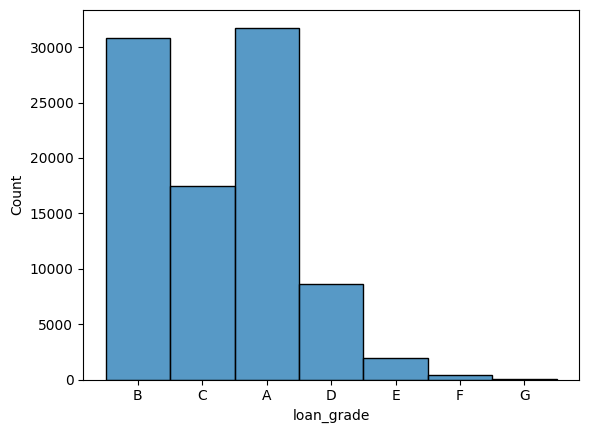

In [19]:
sns.histplot(train_origin['loan_grade'])

In [21]:
loan_intent_group = train_origin.groupby(['loan_intent'])['loan_status'].agg(['count', 'mean'])
loan_intent_group

,count,mean
loan_intent,,
DEBTCONSOLIDATION,14345,0.224399
EDUCATION,18724,0.129940
HOMEIMPROVEMENT,9885,0.205564
MEDICAL,17005,0.209938
PERSONAL,15537,0.156272
VENTURE,15730,0.112905


In [22]:
person_home_ownership_group = train_origin.groupby(['person_home_ownership'])['loan_status'].agg(['count', 'mean'])
person_home_ownership_group

,count,mean
person_home_ownership,,
MORTGAGE,38268,0.082915
OTHER,196,0.244898
OWN,5722,0.041244
RENT,47040,0.255123


The majority of borrowers fall into the "RENT" category (47,040), followed by "MORTGAGE" (38,268), "OWN" (5,722), and a small number in "OTHER" (196). This distribution suggests that a large segment of the loan applicants are renting their homes.

In [23]:
cb_person_default_on_file_group = train_origin.groupby(['cb_person_default_on_file'])['loan_status'].agg(['count', 'mean'])
cb_person_default_on_file_group

,count,mean
cb_person_default_on_file,,
N,76779,0.139166
Y,14447,0.330380


The majority of borrowers in the dataset do not have a default on file, with 76,779 individuals in the "N" (No) category, compared to 14,447 in the "Y" (Yes) category. This suggests that a significant portion of the applicants have a clean credit history.

In [24]:
# all persons older then 80 have loan_status (0)
train_origin[train_origin['person_age'] > 80]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
4962,84,108928,MORTGAGE,3.0,DEBTCONSOLIDATION,A,6000,7.51,0.06,N,25,0
6750,84,94800,MORTGAGE,2.0,PERSONAL,D,10000,14.09,0.11,N,22,0
47336,123,36000,MORTGAGE,7.0,PERSONAL,B,6700,10.75,0.18,N,4,0
58726,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0.02,N,3,0
58828,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0.03,N,2,0
59220,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0.25,N,3,0
59392,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0.26,N,4,0
90942,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0.00,N,25,0
91061,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0.27,N,27,0
91151,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0.11,N,24,0


In [25]:
# drop persons with age more then 80
train_origin = train_origin.drop(train_origin[train_origin['person_age'] > 80].index)

In [26]:
train_origin[(train_origin['person_emp_length'] > 30) & (train_origin['person_age'] < 50)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
24214,43,50000,RENT,35.0,DEBTCONSOLIDATION,A,9000,5.42,0.18,N,16,0
26125,43,56000,RENT,41.0,HOMEIMPROVEMENT,B,2000,10.99,0.04,N,14,0
29271,47,53913,MORTGAGE,31.0,HOMEIMPROVEMENT,B,7000,10.71,0.13,N,13,1
39112,46,84000,MORTGAGE,31.0,HOMEIMPROVEMENT,D,20000,17.49,0.24,N,8,0
41079,28,60350,MORTGAGE,123.0,MEDICAL,D,25000,15.95,0.35,Y,6,1
48287,48,70000,MORTGAGE,31.0,HOMEIMPROVEMENT,A,9000,8.94,0.13,N,8,0
49252,21,192000,MORTGAGE,123.0,VENTURE,B,20000,11.49,0.10,N,2,0
52038,38,42000,MORTGAGE,31.0,VENTURE,B,11000,11.49,0.26,N,14,0
53832,46,52000,MORTGAGE,31.0,VENTURE,B,10000,9.91,0.19,N,16,0
58645,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1


The employment length of 123 years for individuals aged 21 to 28 is clearly unrealistic, suggesting data entry errors or anomalies and some clients have difference between age and length of the employment less then 18 year

In [29]:
train_origin[train_origin['person_age'] - train_origin['person_emp_length'] < 0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
41079,28,60350,MORTGAGE,123.0,MEDICAL,D,25000,15.95,0.35,Y,6,1
49252,21,192000,MORTGAGE,123.0,VENTURE,B,20000,11.49,0.10,N,2,0
58645,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
58855,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0.10,N,4,0


In [30]:
indices_to_drop = train_origin.index[(train_origin['person_age'] - train_origin['person_emp_length'] < 0)]
train_origin = train_origin.drop(indices_to_drop)

In [31]:
train_origin[train_origin['person_emp_length'] == 123]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


In [ ]:
# median_emp_length_22 = train_origin[train_origin['person_age']== 22]['person_emp_length'].median()
# # Replace person_emp_length with the median value for age 22
# train_origin.loc[train_origin['person_age'] == 22, 'person_emp_length'] = median_emp_length_22

# median_emp_length_28 = train_origin[train_origin['person_age']== 28]['person_emp_length'].median()
# # Replace person_emp_length with the median value for age 28
# train_origin.loc[train_origin['person_age'] == 28, 'person_emp_length'] = median_emp_length_28

In [32]:
limit = train_origin.shape[0]
limit

91212

In [37]:
test = test.drop('id', axis=1)

KeyError: "['id'] not found in axis"

In [70]:
df = pd.concat([train_origin, test], axis=0, ignore_index=True)

In [71]:
df.shape

(130310, 12)

In [72]:
100 * (train_origin.isna().sum()/len(test)).sort_values(ascending=False)

,0
loan_int_rate,7.964602
person_emp_length,2.289120
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_percent_income,0.000000
cb_person_default_on_file,0.000000


In [74]:
# Fill missing values in 'loan_int_rate' based on mean in each 'loan_intent' group
df['loan_int_rate'] = df['loan_int_rate'].fillna(df.groupby('loan_intent')['loan_int_rate'].transform('mean'))

# Fill missing values in 'person_emp_length' based on mean in each 'loan_intent' group
df['person_emp_length'] = df['person_emp_length'].fillna(df.groupby('loan_intent')['person_emp_length'].transform('median'))


**Fill missing values**

In [ ]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=29)

# columns_to_impute = ['person_emp_length', 'loan_int_rate']

# # Fit and transform the DataFrame to fill in missing values
# df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [75]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


In [ ]:
# df['person_emp_length']  = df['person_emp_length'].fillna(df['person_emp_length'].median())
# df['loan_int_rate']  = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

**Create new additional feature**

In [76]:
#Debt-to-Income Ratio
df['dti'] = df['loan_amnt'] / df['person_income']

#Employment Stability
df['emp_stability'] = df['person_emp_length'].apply(lambda x: 1 if x > 5 else 0)

#Home Ownership Binary Feature
def cred_hist_category(cred_hist_length):
    if cred_hist_length < 5:
        return 'short_history'
    elif 5 <= cred_hist_length <= 10:
        return 'medium_history'
    else:
        return 'long_history'

df['cred_hist_category'] = df['cb_person_cred_hist_length'].apply(cred_hist_category)


In [45]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,dti,emp_stability,cred_hist_category
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0.0,0.171429,0,long_history
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0.0,0.071429,1,short_history
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0.0,0.208333,1,medium_history
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0.0,0.171429,1,medium_history
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0.0,0.100000,0,short_history


In [77]:
loan_grade_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
cb_person_default_on_file_dict = {'N': 0, 'Y':1}
person_home_ownership_dict = {'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3}
loan_intent_dict = {'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2, 'VENTURE': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5}

In [78]:
df['loan_grade'] = df['loan_grade'].map(loan_grade_dict)
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map(cb_person_default_on_file_dict)
df['person_home_ownership'] = df['person_home_ownership'].map(person_home_ownership_dict)
df['loan_intent'] = df['loan_intent'].map(loan_intent_dict)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# # Label encode 'person_home_ownership' and 'loan_intent'
# df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
# df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])

In [79]:
df_encoded = pd.get_dummies(df, drop_first=True, dtype='int')

In [80]:
df_encoded.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,dti,emp_stability,cred_hist_category_medium_history,cred_hist_category_short_history
0,37,35000,0,0.0,0,1,6000,11.49,0.17,0,14,0.0,0.171429,0,0,0
1,22,56000,2,6.0,1,2,4000,13.35,0.07,0,2,0.0,0.071429,1,0,1
2,29,28800,2,8.0,2,0,6000,8.90,0.21,0,10,0.0,0.208333,1,1,0
3,30,70000,0,14.0,3,1,12000,11.11,0.17,0,5,0.0,0.171429,1,1,0
4,22,60000,0,2.0,1,0,6000,6.92,0.10,0,3,0.0,0.100000,0,0,1


In [81]:
train_df = df_encoded.iloc[:limit, :]
test_df = df_encoded.iloc[limit:, :]

In [68]:
train_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,dti,emp_stability,cred_hist_category_medium_history,cred_hist_category_short_history
0,37,35000,0,0.0,0,1,6000,11.49,0.17,0,14,0.0,0.171429,0,0,0
1,22,56000,2,6.0,1,2,4000,13.35,0.07,0,2,0.0,0.071429,1,0,1
2,29,28800,2,8.0,2,0,6000,8.90,0.21,0,10,0.0,0.208333,1,1,0
3,30,70000,0,14.0,3,1,12000,11.11,0.17,0,5,0.0,0.171429,1,1,0
4,22,60000,0,2.0,1,0,6000,6.92,0.10,0,3,0.0,0.100000,0,0,1


In [82]:
train_df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


In [83]:
train_df.shape

(91212, 16)

In [84]:
y = train_df['loan_status']
X = train_df.drop('loan_status', axis=1)

In [ ]:
#full_train = pd.concat([balanced_df, test_df], ignore_index=True, axis=0)

In [ ]:
#full_train.head()

In [ ]:
#df_encoded = pd.get_dummies(full_train, columns=['person_home_ownership', 'loan_intent'], drop_first=True, dtype='int')

In [ ]:
# train_data = df_encoded.iloc[:balanced_df.shape[0], :]
# test_data = df_encoded.iloc[balanced_df.shape[0]:, :]

In [ ]:
# y = train_data['loan_status']
# X = train_data.drop(['loan_status'], axis=1)

In [ ]:
#train_df['loan_grade_6']

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer


max_score = 0

# Loop over values of k from 3 to 20
for k in range(3, 30):
    print(f"======== Processing k = {k} ========")

    # Initialize the KNN imputer with the current value of k
    imputer = KNNImputer(n_neighbors=k)

    # Fit and transform the data to handle missing values
    X_imputed = imputer.fit_transform(X)

    # Split the imputed data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

    # Initialize and fit the RandomForest model
    model = CatBoostClassifier(
            iterations=800,
            learning_rate=0.1,
            depth=4,
            class_weights={0: 1, 1: 4},  # Example of giving more weight to the minority class
        #    cat_features=cat_features,
            border_count = 253,
            eval_metric='AUC',           # Use AUC as the evaluation metric
            random_seed=42,
            verbose=100
        )
    model.fit(X_train, y_train)

    # Evaluate the model and get the score
    score = model.score(X_test, y_test)

    # Update max_score and X_result if the current score is higher
    if score > max_score:
        X_result = X_imputed
        max_score = score

    print(f"k={k}, score={score}")

print(f"Best score: {max_score}")


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


# Define StratifiedKFold
skf = StratifiedKFold(n_splits=5)  # 5-fold cross-validation

# Model to train
model = RandomForestClassifier(class_weight='balanced', random_state=42)


# List to store AUC scores
auc_scores = []

# Cross-validation process
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Get predicted probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_prob)
    print(auc)
    auc_scores.append(auc)

# Average AUC across all folds
print(f"Average AUC: {sum(auc_scores) / len(auc_scores):.4f}")


In [51]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


In [52]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

# Define StratifiedKFold
skf = StratifiedKFold(n_splits=5)  # 5-fold cross-validation



model_cat = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=4,
    class_weights={0: 1, 1: 4},  # Example of giving more weight to the minority class
#    cat_features=cat_features,
    border_count = 253,
    eval_metric='AUC',           # Use AUC as the evaluation metric
    random_seed=42,
    verbose=100
)

# List to store AUC scores
auc_scores = []

# Cross-validation process
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model_cat.fit(X_train, y_train)

    # Get predicted probabilities for the positive class
    y_prob = model_cat.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_prob)
    print(auc)
    auc_scores.append(auc)

# Average AUC across all folds
print(f"Average AUC: {sum(auc_scores) / len(auc_scores):.4f}")


0:	total: 120ms	remaining: 1m 59s
100:	total: 6.13s	remaining: 54.5s
200:	total: 10.6s	remaining: 42.1s
300:	total: 14.5s	remaining: 33.6s
400:	total: 18.5s	remaining: 27.7s
500:	total: 23s	remaining: 22.9s
600:	total: 24.7s	remaining: 16.4s
700:	total: 26.4s	remaining: 11.3s
800:	total: 28.1s	remaining: 6.98s
900:	total: 29.8s	remaining: 3.27s
999:	total: 32.5s	remaining: 0us
0.9613918546777322
0:	total: 34.6ms	remaining: 34.6s
100:	total: 2.4s	remaining: 21.4s
200:	total: 4.01s	remaining: 16s
300:	total: 5.66s	remaining: 13.1s
400:	total: 7.32s	remaining: 10.9s
500:	total: 8.98s	remaining: 8.94s
600:	total: 10.7s	remaining: 7.08s
700:	total: 13.6s	remaining: 5.82s
800:	total: 16.1s	remaining: 4s
900:	total: 17.8s	remaining: 1.95s
999:	total: 20.1s	remaining: 0us
0.9622363208214538
0:	total: 21.3ms	remaining: 21.3s
100:	total: 1.68s	remaining: 14.9s
200:	total: 3.28s	remaining: 13s
300:	total: 5.39s	remaining: 12.5s
400:	total: 8.69s	remaining: 13s
500:	total: 10.3s	remaining: 10.3s
6

In [85]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

# Define StratifiedKFold
skf = StratifiedKFold(n_splits=5)  # 5-fold cross-validation

# {'iterations': 1497, 'learning_rate': 0.19862700515892123, 'depth': 3, 'border_count': 241, 'class_weight_minority': 2.8609507839857535}
#=====================================================>
# Best trial:
#   AUC: 0.9556
#   Best hyperparameters:
#     iterations: 879
#     learning_rate: 0.1561887708120853
#     depth: 4
#     class_weight_1: 3.477422577956937
#=====================================================>
# AUC: 0.9555
#   Best hyperparameters:
#     iterations: 800
#     learning_rate: 0.1602862461381873
#     depth: 4
#     class_weight_1: 4.057615328778761
#     l2_leaf_reg: 1.9997008833387273
#     border_count: 253

# Trial 26 finished with value: 0.9559910493753032 and parameters:
#         {'iterations': 1000, 'learning_rate': 0.33434388058409265}. Best is trial 26 with value: 0.9559910493753032.
model_cat = CatBoostClassifier(
    iterations=1497,
    learning_rate=0.19862700515892123,
    depth=3,
    class_weights={0: 1, 1: 2.8609507839857535},  # Example of giving more weight to the minority class
#    cat_features=cat_features,
    border_count = 241,
    eval_metric='AUC',           # Use AUC as the evaluation metric
    random_seed=42,
    verbose=100
)

# List to store AUC scores
auc_scores = []

# Cross-validation process
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model_cat.fit(X_train, y_train)

    # Get predicted probabilities for the positive class
    y_prob = model_cat.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_prob)
    print(auc)
    auc_scores.append(auc)

# Average AUC across all folds
print(f"Average AUC: {sum(auc_scores) / len(auc_scores):.4f}")


0:	total: 15ms	remaining: 22.4s
100:	total: 1.54s	remaining: 21.3s
200:	total: 3.07s	remaining: 19.8s
300:	total: 4.54s	remaining: 18s
400:	total: 6.04s	remaining: 16.5s
500:	total: 7.54s	remaining: 15s
600:	total: 10.4s	remaining: 15.6s
700:	total: 12.5s	remaining: 14.2s
800:	total: 14s	remaining: 12.1s
900:	total: 15.5s	remaining: 10.2s
1000:	total: 17s	remaining: 8.4s
1100:	total: 18.4s	remaining: 6.63s
1200:	total: 19.9s	remaining: 4.91s
1300:	total: 21.5s	remaining: 3.23s
1400:	total: 25s	remaining: 1.71s
1496:	total: 26.4s	remaining: 0us
0.9617351675351371
0:	total: 13.5ms	remaining: 20.2s
100:	total: 1.51s	remaining: 20.9s
200:	total: 2.99s	remaining: 19.3s
300:	total: 4.49s	remaining: 17.8s
400:	total: 5.99s	remaining: 16.4s
500:	total: 7.48s	remaining: 14.9s
600:	total: 9.84s	remaining: 14.7s
700:	total: 12.5s	remaining: 14.2s
800:	total: 14s	remaining: 12.1s
900:	total: 15.5s	remaining: 10.3s
1000:	total: 17s	remaining: 8.4s
1100:	total: 18.4s	remaining: 6.63s
1200:	total: 19

Average AUC: 0.9563

0.9512
0.9536

In [ ]:
import pandas as pd
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

# Sample data setup (replace this with your actual DataFrame)
# X, y = your_data_here  # Ensure you have defined your features and target

# Define the objective function for hyperparameter tuning
def objective(trial):
    # Define hyperparameters to tune
    iterations = trial.suggest_int("iterations", 500, 1500)  # Adjust range as needed
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
    depth = trial.suggest_int("depth", 2, 6)  # Tune the depth range
    border_count = trial.suggest_int("border_count", 1, 255)  # Typical range for CatBoost

    # Only tune the minority class weight (class 1)
    class_weight_minority = trial.suggest_float("class_weight_minority", 1.0, 10.0)  # Adjust range as needed
    class_weight = {0: 1, 1: class_weight_minority}  # Majority class weight fixed to 1

    # Initialize the model with the suggested hyperparameters
    model_cat = CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        class_weights=class_weight,
        border_count=border_count,
        eval_metric='AUC',
        random_seed=42,
        verbose=0
    )

    # Perform cross-validation
    auc_scores = []
    skf = StratifiedKFold(n_splits=5)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model_cat.fit(X_train, y_train)

        # Get predicted probabilities for the positive class
        y_prob = model_cat.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
        auc_scores.append(auc)

    # Return the average AUC score
    return sum(auc_scores) / len(auc_scores)

# Create the Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Output the best hyperparameters and the corresponding AUC score
print("Best hyperparameters:", study.best_params)
print("Best AUC score:", study.best_value)


In [ ]:
import pandas as pd
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

# Define the objective function
def objective(trial):
    # Define hyperparameters to tune
    #learning_rate = 0.1602862461381873,#trial.suggest_float("learning_rate", 0.01, 0.3)
    depth = 4
    iterations = trial.suggest_int("iterations", 1000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
    class_weight = {0: 1, 1: 4.057615328778761}
    border_count = 253#trial.suggest_int("border_count", 1, 255)  # Typical range for CatBoost
   # l2_leaf_reg = trial.suggest_float("l2_leaf_reg", 1, 10)  # Regularization term range

    # Initialize the model with the suggested hyperparameters
    model_cat = CatBoostClassifier(
        iterations=iterations,
        learning_rate=0.1602862461381873,
        depth=depth,
        class_weights=class_weight,
        border_count=border_count,
        #l2_leaf_reg=l2_leaf_reg,
        eval_metric='AUC',
        random_seed=42,
        verbose=0
    )

    # Perform cross-validation
    auc_scores = []
    skf = StratifiedKFold(n_splits=5)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model_cat.fit(X_train, y_train)

        # Get predicted probabilities for the positive class
        y_prob = model_cat.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
        auc_scores.append(auc)

    # Return the average AUC score
    return sum(auc_scores) / len(auc_scores)

# Create the Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Output the best hyperparameters and the corresponding AUC score
print("Best hyperparameters:", study.best_params)
print("Best AUC score:", study.best_value)


In [86]:
test_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,dti,emp_stability,cred_hist_category_medium_history,cred_hist_category_short_history
91212,23,69000,0,3.0,5,5,25000,15.76,0.36,0,2,NaN,0.362319,0,0,1
91213,26,96000,1,6.0,2,2,10000,12.68,0.10,1,4,NaN,0.104167,1,0,1
91214,26,30000,0,5.0,3,4,4000,17.19,0.13,1,2,NaN,0.133333,0,0,1
91215,33,50000,0,4.0,4,0,7000,8.90,0.14,0,7,NaN,0.140000,0,1,0
91216,26,102000,1,8.0,5,3,15000,16.32,0.15,1,4,NaN,0.147059,1,0,1


In [87]:
test_df = test_df.drop('loan_status', axis=1)

In [88]:
test_predictions = model_cat.predict_proba(test_df)[:, 1]

In [89]:
test_predictions

array([0.9999676 , 0.09364065, 0.84046548, ..., 0.02607341, 0.47879778,
       0.98848271])

In [90]:
submission = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')
submission['loan_status'] = test_predictions
submission.to_csv('1210_1_sub.csv', index=False)
submission.head()

,id,loan_status
0,58645,0.999968
1,58646,0.093641
2,58647,0.840465
3,58648,0.021648
4,58649,0.181554


In [ ]:
import pandas as pd
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

# Define your StratifiedKFold
skf = StratifiedKFold(n_splits=5)  # 5-fold cross-validation

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters for tuning
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 10.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    # List to store AUC scores
    auc_scores = []

    # Cross-validation process
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Create and train the model
        model = XGBClassifier(**params)
        model.fit(X_train, y_train)

        # Get predicted probabilities for the positive class
        y_prob = model.predict_proba(X_test)[:, 1]

        # Calculate AUC
        auc = roc_auc_score(y_test, y_prob)
        auc_scores.append(auc)

    # Return the average AUC score
    return sum(auc_scores) / len(auc_scores)

# Create a study object
study = optuna.create_study(direction='maximize')

# Optimize the objective function
study.optimize(objective, n_trials=50)  # Adjust the number of trials as needed

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)
print('Best AUC:', study.best_value)
